In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [7]:
print("Available columns in your dataset:")
print(df.columns.tolist())

Available columns in your dataset:
['total_spent', 'avg_purchase_value', 'visits_per_month', 'buyer_type']


In [8]:
target_column = input("Enter the name of the column that indicates returns (e.g., 'return', 'status'): ")
while target_column not in df.columns:
    print(f"Column '{target_column}' not found in dataset.")
    target_column = input("Please enter a valid column name: ")

Enter the name of the column that indicates returns (e.g., 'return', 'status'): return
Column 'return' not found in dataset.
Please enter a valid column name: total_spent


In [11]:
print("\nAvailable features:")
print([col for col in df.columns if col != target_column])
feature_choices = input("Enter column names to use as features (comma separated): ").split(',')
features = [f.strip() for f in feature_choices if f.strip() in df.columns]


Available features:
['avg_purchase_value', 'visits_per_month', 'buyer_type']
Enter column names to use as features (comma separated): visits_per_month


In [12]:
if not features:
    features = [col for col in df.columns if col != target_column][:3]  # Use first 3 non-target columns as default
    print(f"\nUsing default features: {features}")

In [13]:
print(f"\nUnique values in '{target_column}':")
print(df[target_column].value_counts())


Unique values in 'total_spent':
total_spent
4007.982067    1
3117.968387    1
4232.062646    1
577.820196     1
2839.005107    1
              ..
2676.205476    1
1322.669398    1
109.890737     1
953.000209     1
673.623603     1
Name: count, Length: 100, dtype: int64


In [14]:
if df[target_column].nunique() == 2:  # If exactly 2 unique values
    df['target'] = (df[target_column] == df[target_column].value_counts().idxmax()[0]).astype(int)
else:
    # Let user specify which value means "returned"
    returned_value = input(f"Which value in '{target_column}' indicates a return? ")
    df['target'] = (df[target_column] == returned_value).astype(int)

Which value in 'total_spent' indicates a return? 2


In [15]:
df_clean = df[features + ['target']].dropna()

In [16]:
X = df_clean[features]
y = df_clean['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nModel Accuracy: {accuracy:.2%}")



Model Accuracy: 100.00%


In [30]:
# Example of a confusion matrix
y_true = [0, 1, 0, 1, 1, 0, 1]  # Actual values
y_pred = [0, 0, 0, 1, 1, 0, 1]  # Predicted values

In [31]:
# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

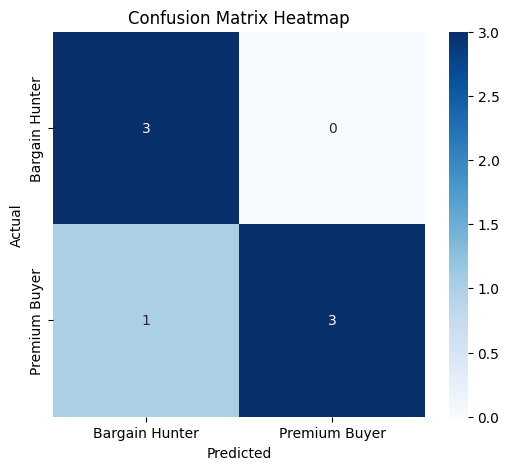

In [32]:
# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bargain Hunter', 'Premium Buyer'], yticklabels=['Bargain Hunter', 'Premium Buyer'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
